In [1]:
import numpy as np
import pandas as pd
import keras
import keras.backend as kb
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from datetime import date as dt
from datetime import datetime

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

df = pd.read_csv('Datasets/covid_19_india.csv')

df.head()

Using TensorFlow backend.


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [2]:
df['Date']
#df['Date'] = pd.to_datetime(df.Date)

D=[]
for item in df['Date']:
    day = item[0]+item[1]
    month = item[3] + item[4]
    year = item[6] + item[7]
    xx = day + '-' + month + '-' + year
    xx = datetime.strptime(xx, '%d-%m-%y') 
    D.append(xx)

#df = df.loc[df['Date'] == nod, 'Confirmed'].sum()

df['Date'] = D

#df['Date'] = df['Date'].astype('datetime64[ns]') 

df


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
1409,1410,2020-04-28,5:00 PM,Telengana,-,-,321,26,1004
1410,1411,2020-04-28,5:00 PM,Tripura,-,-,2,0,2
1411,1412,2020-04-28,5:00 PM,Uttarakhand,-,-,33,0,51
1412,1413,2020-04-28,5:00 PM,Uttar Pradesh,-,-,400,31,2043


In [3]:
df['date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')
df['Time'] = pd.to_datetime(df.Time)
df['time_delta'] = (df['Time'] - df['Time'].min())  / np.timedelta64(1,'D')

df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,date_delta,time_delta
0,1,2020-01-30,2020-04-30 18:00:00,Kerala,1,0,0,0,1,0.0,0.333333
1,2,2020-01-31,2020-04-30 18:00:00,Kerala,1,0,0,0,1,1.0,0.333333
2,3,2020-02-01,2020-04-30 18:00:00,Kerala,2,0,0,0,2,2.0,0.333333
3,4,2020-02-02,2020-04-30 18:00:00,Kerala,3,0,0,0,3,3.0,0.333333
4,5,2020-02-03,2020-04-30 18:00:00,Kerala,3,0,0,0,3,4.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
1409,1410,2020-04-28,2020-04-30 17:00:00,Telengana,-,-,321,26,1004,89.0,0.291667
1410,1411,2020-04-28,2020-04-30 17:00:00,Tripura,-,-,2,0,2,89.0,0.291667
1411,1412,2020-04-28,2020-04-30 17:00:00,Uttarakhand,-,-,33,0,51,89.0,0.291667
1412,1413,2020-04-28,2020-04-30 17:00:00,Uttar Pradesh,-,-,400,31,2043,89.0,0.291667


In [4]:
df = df.sort_values(by=['date_delta'])
df.drop(df.iloc[:, 0:8], inplace = True, axis = 1)
df.drop(['time_delta'], inplace = True, axis = 1)
df = df.groupby(['date_delta'],as_index=False).sum()

df

,date_delta,Confirmed
0,0.0,1
1,1.0,1
2,2.0,2
3,3.0,3
4,4.0,3
...,...,...
85,85.0,23452
86,86.0,24893
87,87.0,26605
88,88.0,28160


In [5]:
X = df['date_delta']
y = df['Confirmed']


X=np.array(X,dtype='float')
y = np.array(y,dtype='int')



X=X.reshape(-1,1)
y=y.reshape(-1,1)


X

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.],
       [31.],
       [32.],
       [33.],
       [34.],
       [35.],
       [36.],
       [37.],
       [38.],
       [39.],
       [40.],
       [41.],
       [42.],
       [43.],
       [44.],
       [45.],
       [46.],
       [47.],
       [48.],
       [49.],
       [50.],
       [51.],
       [52.],
       [53.],
       [54.],
       [55.],
       [56.],
       [57.],
       [58.],
       [59.],
       [60.],
       [61.],
       [62.],
       [63.],
       [64.],
       [65.],
       [66.],
       [67.],
       [68.],
       [69.],
       [70.],
      

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)
#X_test
from sklearn.preprocessing import PolynomialFeatures
#poly_reg = PolynomialFeatures(degree = 4)
#X_poly = poly_reg.fit_transform(X_train)

#X_poly

In [7]:
model = Sequential()
model.add(Dense(500, input_dim=1, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

In [8]:
optimizer = tf.keras.optimizers.RMSprop(0.0099)
model.compile(loss='mean_squared_error',optimizer=optimizer)
model.fit(X_train,y_train,epochs=4500)

Epoch 1/4500
63/63 [==============================] - 0s 1ms/step - loss: 161017.3981
Epoch 2/4500
63/63 [==============================] - 0s 247us/step - loss: 120122.0069
Epoch 3/4500
63/63 [==============================] - 0s 248us/step - loss: 108009.6538
Epoch 4/4500
63/63 [==============================] - 0s 0us/step - loss: 120728.0945
Epoch 5/4500
63/63 [==============================] - 0s 248us/step - loss: 97075.6469
Epoch 6/4500
63/63 [==============================] - 0s 0us/step - loss: 92991.5811
Epoch 7/4500
63/63 [==============================] - 0s 248us/step - loss: 94541.0324
Epoch 8/4500
63/63 [==============================] - 0s 248us/step - loss: 106898.1209
Epoch 9/4500
63/63 [==============================] - 0s 248us/step - loss: 99217.2299
Epoch 10/4500
63/63 [==============================] - 0s 0us/step - loss: 90700.2212
Epoch 11/4500
63/63 [==============================] - 0s 0us/step - loss: 103751.5206
Epoch 12/4500
63/63 [========================

Epoch 95/4500
63/63 [==============================] - 0s 0us/step - loss: 64388.7190
Epoch 96/4500
63/63 [==============================] - 0s 0us/step - loss: 93075.5273
Epoch 97/4500
63/63 [==============================] - 0s 248us/step - loss: 68394.1936
Epoch 98/4500
63/63 [==============================] - 0s 0us/step - loss: 144640.4273
Epoch 99/4500
63/63 [==============================] - 0s 248us/step - loss: 63458.6438
Epoch 100/4500
63/63 [==============================] - 0s 248us/step - loss: 60989.8935
Epoch 101/4500
63/63 [==============================] - 0s 0us/step - loss: 59540.7374
Epoch 102/4500
63/63 [==============================] - 0s 248us/step - loss: 62810.6385
Epoch 103/4500
63/63 [==============================] - 0s 0us/step - loss: 58285.5421
Epoch 104/4500
63/63 [==============================] - 0s 0us/step - loss: 55019.3275
Epoch 105/4500
63/63 [==============================] - 0s 248us/step - loss: 53645.3782
Epoch 106/4500
63/63 [===============

63/63 [==============================] - 0s 0us/step - loss: 107808.6409
Epoch 189/4500
63/63 [==============================] - 0s 248us/step - loss: 49786.0468
Epoch 190/4500
63/63 [==============================] - 0s 0us/step - loss: 77003.7984
Epoch 191/4500
63/63 [==============================] - 0s 248us/step - loss: 69581.0097
Epoch 192/4500
63/63 [==============================] - 0s 248us/step - loss: 72334.5475
Epoch 193/4500
63/63 [==============================] - 0s 0us/step - loss: 53711.1107
Epoch 194/4500
63/63 [==============================] - 0s 248us/step - loss: 50139.4303
Epoch 195/4500
63/63 [==============================] - 0s 248us/step - loss: 121010.2021
Epoch 196/4500
63/63 [==============================] - 0s 0us/step - loss: 50891.0736
Epoch 197/4500
63/63 [==============================] - 0s 248us/step - loss: 44577.4413
Epoch 198/4500
63/63 [==============================] - 0s 0us/step - loss: 42936.6194
Epoch 199/4500
63/63 [======================

63/63 [==============================] - 0s 248us/step - loss: 36125.0740
Epoch 282/4500
63/63 [==============================] - 0s 0us/step - loss: 38169.3251
Epoch 283/4500
63/63 [==============================] - 0s 248us/step - loss: 39374.5180
Epoch 284/4500
63/63 [==============================] - 0s 248us/step - loss: 103886.4023
Epoch 285/4500
63/63 [==============================] - 0s 0us/step - loss: 33251.6269
Epoch 286/4500
63/63 [==============================] - 0s 248us/step - loss: 31380.0621
Epoch 287/4500
63/63 [==============================] - 0s 0us/step - loss: 30298.6815
Epoch 288/4500
63/63 [==============================] - 0s 0us/step - loss: 81782.7125
Epoch 289/4500
63/63 [==============================] - 0s 248us/step - loss: 147301.6121
Epoch 290/4500
63/63 [==============================] - 0s 0us/step - loss: 72240.6933
Epoch 291/4500
63/63 [==============================] - 0s 248us/step - loss: 46574.2967
Epoch 292/4500
63/63 [======================

63/63 [==============================] - 0s 0us/step - loss: 47447.6013
Epoch 375/4500
63/63 [==============================] - 0s 248us/step - loss: 30750.9280
Epoch 376/4500
63/63 [==============================] - 0s 0us/step - loss: 32606.7524
Epoch 377/4500
63/63 [==============================] - 0s 0us/step - loss: 87643.0389
Epoch 378/4500
63/63 [==============================] - 0s 248us/step - loss: 114934.6131
Epoch 379/4500
63/63 [==============================] - 0s 0us/step - loss: 41413.8138
Epoch 380/4500
63/63 [==============================] - 0s 0us/step - loss: 40666.0954
Epoch 381/4500
63/63 [==============================] - 0s 248us/step - loss: 39250.1868
Epoch 382/4500
63/63 [==============================] - 0s 0us/step - loss: 38250.4750
Epoch 383/4500
63/63 [==============================] - 0s 0us/step - loss: 54065.8656
Epoch 384/4500
63/63 [==============================] - 0s 248us/step - loss: 73276.0319
Epoch 385/4500
63/63 [===========================

63/63 [==============================] - 0s 248us/step - loss: 88795.6305
Epoch 468/4500
63/63 [==============================] - 0s 0us/step - loss: 27375.0092
Epoch 469/4500
63/63 [==============================] - 0s 248us/step - loss: 59065.0371
Epoch 470/4500
63/63 [==============================] - 0s 0us/step - loss: 28333.7405
Epoch 471/4500
63/63 [==============================] - 0s 0us/step - loss: 24439.9106
Epoch 472/4500
63/63 [==============================] - 0s 248us/step - loss: 70725.1245
Epoch 473/4500
63/63 [==============================] - 0s 0us/step - loss: 43874.5680
Epoch 474/4500
63/63 [==============================] - 0s 248us/step - loss: 31217.9639
Epoch 475/4500
63/63 [==============================] - 0s 0us/step - loss: 24620.6155
Epoch 476/4500
63/63 [==============================] - 0s 0us/step - loss: 25312.9530
Epoch 477/4500
63/63 [==============================] - 0s 248us/step - loss: 44950.7484
Epoch 478/4500
63/63 [==========================

63/63 [==============================] - 0s 248us/step - loss: 68437.0352
Epoch 561/4500
63/63 [==============================] - 0s 248us/step - loss: 53249.5273
Epoch 562/4500
63/63 [==============================] - 0s 0us/step - loss: 21569.7869
Epoch 563/4500
63/63 [==============================] - 0s 248us/step - loss: 26502.8005
Epoch 564/4500
63/63 [==============================] - 0s 248us/step - loss: 18865.2297
Epoch 565/4500
63/63 [==============================] - 0s 0us/step - loss: 25051.9490
Epoch 566/4500
63/63 [==============================] - 0s 0us/step - loss: 31827.4621
Epoch 567/4500
63/63 [==============================] - 0s 249us/step - loss: 35888.7181
Epoch 568/4500
63/63 [==============================] - 0s 0us/step - loss: 35423.5900
Epoch 569/4500
63/63 [==============================] - 0s 247us/step - loss: 64285.8137
Epoch 570/4500
63/63 [==============================] - 0s 248us/step - loss: 75997.2509
Epoch 571/4500
63/63 [======================

63/63 [==============================] - 0s 0us/step - loss: 28546.7390
Epoch 654/4500
63/63 [==============================] - 0s 248us/step - loss: 63728.0839
Epoch 655/4500
63/63 [==============================] - 0s 0us/step - loss: 76336.3000
Epoch 656/4500
63/63 [==============================] - 0s 248us/step - loss: 31846.6681
Epoch 657/4500
63/63 [==============================] - 0s 248us/step - loss: 25768.2918
Epoch 658/4500
63/63 [==============================] - 0s 0us/step - loss: 31249.4405
Epoch 659/4500
63/63 [==============================] - 0s 247us/step - loss: 22407.0742
Epoch 660/4500
63/63 [==============================] - 0s 0us/step - loss: 47214.7267
Epoch 661/4500
63/63 [==============================] - 0s 0us/step - loss: 38756.9549
Epoch 662/4500
63/63 [==============================] - 0s 248us/step - loss: 36029.4580
Epoch 663/4500
63/63 [==============================] - 0s 0us/step - loss: 47638.7284
Epoch 664/4500
63/63 [==========================

63/63 [==============================] - 0s 0us/step - loss: 16353.7028
Epoch 746/4500
63/63 [==============================] - 0s 248us/step - loss: 44015.8507
Epoch 747/4500
63/63 [==============================] - 0s 248us/step - loss: 95033.8937
Epoch 748/4500
63/63 [==============================] - 0s 0us/step - loss: 18853.4223
Epoch 749/4500
63/63 [==============================] - 0s 248us/step - loss: 17689.0077
Epoch 750/4500
63/63 [==============================] - 0s 0us/step - loss: 19629.7528
Epoch 751/4500
63/63 [==============================] - 0s 0us/step - loss: 50245.5686
Epoch 752/4500
63/63 [==============================] - 0s 248us/step - loss: 32744.9297
Epoch 753/4500
63/63 [==============================] - 0s 0us/step - loss: 28647.5211
Epoch 754/4500
63/63 [==============================] - 0s 248us/step - loss: 37001.1793
Epoch 755/4500
63/63 [==============================] - 0s 248us/step - loss: 22505.1928
Epoch 756/4500
63/63 [========================

63/63 [==============================] - 0s 0us/step - loss: 15972.0862
Epoch 839/4500
63/63 [==============================] - 0s 248us/step - loss: 11654.9541
Epoch 840/4500
63/63 [==============================] - 0s 0us/step - loss: 60020.2214
Epoch 841/4500
63/63 [==============================] - 0s 248us/step - loss: 67176.3471
Epoch 842/4500
63/63 [==============================] - 0s 0us/step - loss: 18602.6567
Epoch 843/4500
63/63 [==============================] - 0s 0us/step - loss: 16226.7811
Epoch 844/4500
63/63 [==============================] - 0s 248us/step - loss: 38730.1254
Epoch 845/4500
63/63 [==============================] - 0s 0us/step - loss: 14555.6609
Epoch 846/4500
63/63 [==============================] - 0s 248us/step - loss: 14444.7309
Epoch 847/4500
63/63 [==============================] - 0s 0us/step - loss: 25094.7893
Epoch 848/4500
63/63 [==============================] - 0s 0us/step - loss: 18655.1382
Epoch 849/4500
63/63 [============================

63/63 [==============================] - 0s 0us/step - loss: 18136.2693
Epoch 932/4500
63/63 [==============================] - 0s 248us/step - loss: 19547.0990
Epoch 933/4500
63/63 [==============================] - 0s 0us/step - loss: 16125.3029
Epoch 934/4500
63/63 [==============================] - 0s 0us/step - loss: 15298.9096
Epoch 935/4500
63/63 [==============================] - 0s 248us/step - loss: 39837.1197
Epoch 936/4500
63/63 [==============================] - 0s 0us/step - loss: 54433.7985
Epoch 937/4500
63/63 [==============================] - 0s 248us/step - loss: 15610.6056
Epoch 938/4500
63/63 [==============================] - 0s 248us/step - loss: 12146.1789
Epoch 939/4500
63/63 [==============================] - 0s 0us/step - loss: 13697.5271
Epoch 940/4500
63/63 [==============================] - 0s 248us/step - loss: 13180.5546
Epoch 941/4500
63/63 [==============================] - 0s 0us/step - loss: 11567.1905
Epoch 942/4500
63/63 [==========================

63/63 [==============================] - 0s 248us/step - loss: 31621.4843
Epoch 1025/4500
63/63 [==============================] - 0s 248us/step - loss: 47835.7809
Epoch 1026/4500
63/63 [==============================] - 0s 0us/step - loss: 17548.0444
Epoch 1027/4500
63/63 [==============================] - 0s 248us/step - loss: 17348.7019
Epoch 1028/4500
63/63 [==============================] - 0s 0us/step - loss: 47388.6846
Epoch 1029/4500
63/63 [==============================] - 0s 0us/step - loss: 32105.0128
Epoch 1030/4500
63/63 [==============================] - 0s 248us/step - loss: 47153.2995
Epoch 1031/4500
63/63 [==============================] - 0s 0us/step - loss: 45270.5760
Epoch 1032/4500
63/63 [==============================] - 0s 248us/step - loss: 17585.4745
Epoch 1033/4500
63/63 [==============================] - 0s 0us/step - loss: 25307.7222
Epoch 1034/4500
63/63 [==============================] - 0s 0us/step - loss: 38505.7943
Epoch 1035/4500
63/63 [===============

63/63 [==============================] - 0s 0us/step - loss: 11145.0532
Epoch 1117/4500
63/63 [==============================] - 0s 248us/step - loss: 15570.7569
Epoch 1118/4500
63/63 [==============================] - 0s 0us/step - loss: 31900.3469
Epoch 1119/4500
63/63 [==============================] - 0s 248us/step - loss: 30575.2574
Epoch 1120/4500
63/63 [==============================] - 0s 0us/step - loss: 21457.5714
Epoch 1121/4500
63/63 [==============================] - 0s 0us/step - loss: 12962.8941
Epoch 1122/4500
63/63 [==============================] - 0s 248us/step - loss: 42013.6683
Epoch 1123/4500
63/63 [==============================] - 0s 0us/step - loss: 10757.8235
Epoch 1124/4500
63/63 [==============================] - 0s 0us/step - loss: 10414.2061
Epoch 1125/4500
63/63 [==============================] - 0s 248us/step - loss: 10395.3488
Epoch 1126/4500
63/63 [==============================] - 0s 0us/step - loss: 12338.6408
Epoch 1127/4500
63/63 [=================

63/63 [==============================] - 0s 0us/step - loss: 13147.6722
Epoch 1209/4500
63/63 [==============================] - 0s 248us/step - loss: 10594.2777
Epoch 1210/4500
63/63 [==============================] - 0s 0us/step - loss: 14141.0360
Epoch 1211/4500
63/63 [==============================] - 0s 248us/step - loss: 38039.3579
Epoch 1212/4500
63/63 [==============================] - 0s 0us/step - loss: 36717.0672
Epoch 1213/4500
63/63 [==============================] - 0s 248us/step - loss: 18278.0481
Epoch 1214/4500
63/63 [==============================] - ETA: 0s - loss: 15204.054 - 0s 0us/step - loss: 10957.5429
Epoch 1215/4500
63/63 [==============================] - 0s 0us/step - loss: 20722.3067
Epoch 1216/4500
63/63 [==============================] - 0s 248us/step - loss: 48271.0724
Epoch 1217/4500
63/63 [==============================] - 0s 0us/step - loss: 27899.6974
Epoch 1218/4500
63/63 [==============================] - 0s 248us/step - loss: 10342.2719
Epoch 1219

63/63 [==============================] - 0s 0us/step - loss: 17601.3503
Epoch 1300/4500
63/63 [==============================] - 0s 0us/step - loss: 9143.6351
Epoch 1301/4500
63/63 [==============================] - 0s 248us/step - loss: 10559.9733
Epoch 1302/4500
63/63 [==============================] - 0s 0us/step - loss: 11856.4571
Epoch 1303/4500
63/63 [==============================] - 0s 248us/step - loss: 31867.6794
Epoch 1304/4500
63/63 [==============================] - 0s 0us/step - loss: 8818.3944
Epoch 1305/4500
63/63 [==============================] - 0s 0us/step - loss: 15267.3937
Epoch 1306/4500
63/63 [==============================] - 0s 248us/step - loss: 27004.3322
Epoch 1307/4500
63/63 [==============================] - 0s 0us/step - loss: 35460.3521
Epoch 1308/4500
63/63 [==============================] - 0s 248us/step - loss: 13175.0801
Epoch 1309/4500
63/63 [==============================] - 0s 0us/step - loss: 11136.1938
Epoch 1310/4500
63/63 [===================

63/63 [==============================] - 0s 0us/step - loss: 10970.1161
Epoch 1391/4500
63/63 [==============================] - 0s 248us/step - loss: 9986.9726
Epoch 1392/4500
63/63 [==============================] - 0s 0us/step - loss: 8997.0948
Epoch 1393/4500
63/63 [==============================] - 0s 248us/step - loss: 40756.2043
Epoch 1394/4500
63/63 [==============================] - 0s 0us/step - loss: 49323.3076
Epoch 1395/4500
63/63 [==============================] - 0s 0us/step - loss: 10819.1010
Epoch 1396/4500
63/63 [==============================] - 0s 248us/step - loss: 14897.7141
Epoch 1397/4500
63/63 [==============================] - 0s 248us/step - loss: 10712.7908
Epoch 1398/4500
63/63 [==============================] - 0s 0us/step - loss: 22582.1651
Epoch 1399/4500
63/63 [==============================] - 0s 0us/step - loss: 56854.3610
Epoch 1400/4500
63/63 [==============================] - 0s 248us/step - loss: 9293.8650
Epoch 1401/4500
63/63 [==================

63/63 [==============================] - 0s 0us/step - loss: 22331.7646
Epoch 1483/4500
63/63 [==============================] - 0s 0us/step - loss: 18040.3223
Epoch 1484/4500
63/63 [==============================] - 0s 249us/step - loss: 23444.7243
Epoch 1485/4500
63/63 [==============================] - 0s 0us/step - loss: 45259.5513
Epoch 1486/4500
63/63 [==============================] - 0s 248us/step - loss: 7865.6235
Epoch 1487/4500
63/63 [==============================] - 0s 0us/step - loss: 7516.6680
Epoch 1488/4500
63/63 [==============================] - 0s 0us/step - loss: 11673.9773
Epoch 1489/4500
63/63 [==============================] - 0s 248us/step - loss: 9281.6207
Epoch 1490/4500
63/63 [==============================] - 0s 0us/step - loss: 43789.0506
Epoch 1491/4500
63/63 [==============================] - 0s 248us/step - loss: 18647.1812
Epoch 1492/4500
63/63 [==============================] - 0s 0us/step - loss: 15037.9070
Epoch 1493/4500
63/63 [====================

63/63 [==============================] - 0s 248us/step - loss: 13427.2673
Epoch 1575/4500
63/63 [==============================] - 0s 0us/step - loss: 15932.9516
Epoch 1576/4500
63/63 [==============================] - 0s 248us/step - loss: 8484.3038
Epoch 1577/4500
63/63 [==============================] - 0s 248us/step - loss: 41066.0043
Epoch 1578/4500
63/63 [==============================] - 0s 0us/step - loss: 37597.0931
Epoch 1579/4500
63/63 [==============================] - 0s 248us/step - loss: 8633.8333
Epoch 1580/4500
63/63 [==============================] - 0s 248us/step - loss: 8672.7800
Epoch 1581/4500
63/63 [==============================] - 0s 0us/step - loss: 8146.4898
Epoch 1582/4500
63/63 [==============================] - 0s 248us/step - loss: 7097.0005
Epoch 1583/4500
63/63 [==============================] - 0s 0us/step - loss: 21226.4296
Epoch 1584/4500
63/63 [==============================] - 0s 248us/step - loss: 68843.6158
Epoch 1585/4500
63/63 [================

63/63 [==============================] - 0s 0us/step - loss: 10600.6440
Epoch 1667/4500
63/63 [==============================] - 0s 0us/step - loss: 23930.4247
Epoch 1668/4500
63/63 [==============================] - 0s 248us/step - loss: 26981.4720
Epoch 1669/4500
63/63 [==============================] - 0s 0us/step - loss: 6802.6864
Epoch 1670/4500
63/63 [==============================] - 0s 248us/step - loss: 14325.3379
Epoch 1671/4500
63/63 [==============================] - 0s 248us/step - loss: 28271.3021
Epoch 1672/4500
63/63 [==============================] - 0s 0us/step - loss: 10348.0423
Epoch 1673/4500
63/63 [==============================] - 0s 248us/step - loss: 12570.8842
Epoch 1674/4500
63/63 [==============================] - 0s 248us/step - loss: 10146.8085
Epoch 1675/4500
63/63 [==============================] - 0s 0us/step - loss: 12105.9967
Epoch 1676/4500
63/63 [==============================] - 0s 248us/step - loss: 7512.4722
Epoch 1677/4500
63/63 [===============

63/63 [==============================] - 0s 248us/step - loss: 28000.7697
Epoch 1759/4500
63/63 [==============================] - 0s 0us/step - loss: 25533.6898
Epoch 1760/4500
63/63 [==============================] - 0s 0us/step - loss: 23563.4758
Epoch 1761/4500
63/63 [==============================] - 0s 248us/step - loss: 20654.8142
Epoch 1762/4500
63/63 [==============================] - 0s 0us/step - loss: 5522.1195
Epoch 1763/4500
63/63 [==============================] - 0s 248us/step - loss: 5094.5174
Epoch 1764/4500
63/63 [==============================] - 0s 0us/step - loss: 9583.9417
Epoch 1765/4500
63/63 [==============================] - 0s 0us/step - loss: 46608.3632
Epoch 1766/4500
63/63 [==============================] - 0s 248us/step - loss: 9111.2373
Epoch 1767/4500
63/63 [==============================] - 0s 0us/step - loss: 5197.8419
Epoch 1768/4500
63/63 [==============================] - 0s 248us/step - loss: 7900.4391
Epoch 1769/4500
63/63 [=====================

63/63 [==============================] - 0s 0us/step - loss: 4592.1260
Epoch 1851/4500
63/63 [==============================] - 0s 248us/step - loss: 10495.9681
Epoch 1852/4500
63/63 [==============================] - 0s 248us/step - loss: 21290.6944
Epoch 1853/4500
63/63 [==============================] - 0s 0us/step - loss: 31971.0473
Epoch 1854/4500
63/63 [==============================] - 0s 248us/step - loss: 7295.8221
Epoch 1855/4500
63/63 [==============================] - 0s 0us/step - loss: 4723.9458
Epoch 1856/4500
63/63 [==============================] - 0s 0us/step - loss: 18192.3007
Epoch 1857/4500
63/63 [==============================] - 0s 248us/step - loss: 61345.6877
Epoch 1858/4500
63/63 [==============================] - 0s 0us/step - loss: 19964.1002
Epoch 1859/4500
63/63 [==============================] - 0s 0us/step - loss: 9460.9806
Epoch 1860/4500
63/63 [==============================] - 0s 248us/step - loss: 7199.6578
Epoch 1861/4500
63/63 [====================

63/63 [==============================] - 0s 248us/step - loss: 53215.6039
Epoch 1943/4500
63/63 [==============================] - 0s 0us/step - loss: 7602.9353
Epoch 1944/4500
63/63 [==============================] - 0s 248us/step - loss: 7170.1203
Epoch 1945/4500
63/63 [==============================] - 0s 0us/step - loss: 4837.9231
Epoch 1946/4500
63/63 [==============================] - 0s 0us/step - loss: 19871.3210
Epoch 1947/4500
63/63 [==============================] - 0s 248us/step - loss: 35120.9526
Epoch 1948/4500
63/63 [==============================] - 0s 0us/step - loss: 5141.1033
Epoch 1949/4500
63/63 [==============================] - 0s 248us/step - loss: 4966.9552
Epoch 1950/4500
63/63 [==============================] - 0s 0us/step - loss: 4597.1818
Epoch 1951/4500
63/63 [==============================] - 0s 0us/step - loss: 10807.6965
Epoch 1952/4500
63/63 [==============================] - 0s 248us/step - loss: 41476.3914
Epoch 1953/4500
63/63 [=====================

63/63 [==============================] - 0s 0us/step - loss: 3758.0688
Epoch 2035/4500
63/63 [==============================] - 0s 248us/step - loss: 37789.5169
Epoch 2036/4500
63/63 [==============================] - 0s 0us/step - loss: 46338.0053
Epoch 2037/4500
63/63 [==============================] - 0s 248us/step - loss: 9061.3264
Epoch 2038/4500
63/63 [==============================] - 0s 248us/step - loss: 4487.3384
Epoch 2039/4500
63/63 [==============================] - 0s 0us/step - loss: 5551.1151
Epoch 2040/4500
63/63 [==============================] - 0s 248us/step - loss: 4046.5880
Epoch 2041/4500
63/63 [==============================] - 0s 0us/step - loss: 10525.2247
Epoch 2042/4500
63/63 [==============================] - 0s 248us/step - loss: 7288.6621
Epoch 2043/4500
63/63 [==============================] - ETA: 0s - loss: 741.567 - 0s 0us/step - loss: 4616.9187
Epoch 2044/4500
63/63 [==============================] - 0s 0us/step - loss: 43644.2786
Epoch 2045/4500
63/

63/63 [==============================] - 0s 248us/step - loss: 19184.5212
Epoch 2127/4500
63/63 [==============================] - 0s 0us/step - loss: 8101.8668
Epoch 2128/4500
63/63 [==============================] - 0s 248us/step - loss: 9495.4471
Epoch 2129/4500
63/63 [==============================] - 0s 248us/step - loss: 27710.9939
Epoch 2130/4500
63/63 [==============================] - 0s 0us/step - loss: 7212.0690
Epoch 2131/4500
63/63 [==============================] - 0s 248us/step - loss: 5206.4415
Epoch 2132/4500
63/63 [==============================] - 0s 248us/step - loss: 3783.9735
Epoch 2133/4500
63/63 [==============================] - 0s 0us/step - loss: 26452.1843
Epoch 2134/4500
63/63 [==============================] - 0s 248us/step - loss: 4672.8825
Epoch 2135/4500
63/63 [==============================] - 0s 0us/step - loss: 7110.1870
Epoch 2136/4500
63/63 [==============================] - 0s 0us/step - loss: 32850.0774
Epoch 2137/4500
63/63 [====================

63/63 [==============================] - 0s 248us/step - loss: 5759.0156
Epoch 2219/4500
63/63 [==============================] - 0s 0us/step - loss: 6859.9582
Epoch 2220/4500
63/63 [==============================] - 0s 0us/step - loss: 5739.8083
Epoch 2221/4500
63/63 [==============================] - 0s 248us/step - loss: 32104.5188
Epoch 2222/4500
63/63 [==============================] - 0s 0us/step - loss: 3914.9215
Epoch 2223/4500
63/63 [==============================] - 0s 248us/step - loss: 3386.2572
Epoch 2224/4500
63/63 [==============================] - 0s 248us/step - loss: 7812.6547
Epoch 2225/4500
63/63 [==============================] - 0s 0us/step - loss: 28767.9142
Epoch 2226/4500
63/63 [==============================] - 0s 247us/step - loss: 4650.2155
Epoch 2227/4500
63/63 [==============================] - 0s 0us/step - loss: 3949.5787
Epoch 2228/4500
63/63 [==============================] - 0s 0us/step - loss: 3088.6064
Epoch 2229/4500
63/63 [========================

63/63 [==============================] - 0s 0us/step - loss: 10463.8299
Epoch 2311/4500
63/63 [==============================] - 0s 0us/step - loss: 4222.8527
Epoch 2312/4500
63/63 [==============================] - 0s 248us/step - loss: 13466.5562
Epoch 2313/4500
63/63 [==============================] - 0s 0us/step - loss: 4305.5357
Epoch 2314/4500
63/63 [==============================] - 0s 0us/step - loss: 6739.3211
Epoch 2315/4500
63/63 [==============================] - 0s 248us/step - loss: 22885.5066
Epoch 2316/4500
63/63 [==============================] - 0s 0us/step - loss: 12769.2442
Epoch 2317/4500
63/63 [==============================] - 0s 0us/step - loss: 3973.9938
Epoch 2318/4500
63/63 [==============================] - 0s 248us/step - loss: 3612.3593
Epoch 2319/4500
63/63 [==============================] - 0s 0us/step - loss: 3328.6243
Epoch 2320/4500
63/63 [==============================] - 0s 248us/step - loss: 3241.2866
Epoch 2321/4500
63/63 [========================

63/63 [==============================] - 0s 0us/step - loss: 4438.5266
Epoch 2403/4500
63/63 [==============================] - 0s 248us/step - loss: 13722.7964
Epoch 2404/4500
63/63 [==============================] - 0s 0us/step - loss: 5915.5604
Epoch 2405/4500
63/63 [==============================] - 0s 0us/step - loss: 4169.8782
Epoch 2406/4500
63/63 [==============================] - 0s 248us/step - loss: 4968.8653
Epoch 2407/4500
63/63 [==============================] - 0s 0us/step - loss: 6472.7350
Epoch 2408/4500
63/63 [==============================] - 0s 248us/step - loss: 3609.8055
Epoch 2409/4500
63/63 [==============================] - 0s 0us/step - loss: 3896.0421
Epoch 2410/4500
63/63 [==============================] - 0s 248us/step - loss: 46027.5479
Epoch 2411/4500
63/63 [==============================] - 0s 248us/step - loss: 12729.6394
Epoch 2412/4500
63/63 [==============================] - 0s 0us/step - loss: 3653.5399
Epoch 2413/4500
63/63 [=======================

63/63 [==============================] - 0s 248us/step - loss: 3607.7445
Epoch 2495/4500
63/63 [==============================] - 0s 0us/step - loss: 4953.5042
Epoch 2496/4500
63/63 [==============================] - 0s 248us/step - loss: 7046.5273
Epoch 2497/4500
63/63 [==============================] - 0s 248us/step - loss: 19350.1167
Epoch 2498/4500
63/63 [==============================] - 0s 0us/step - loss: 38572.3674
Epoch 2499/4500
63/63 [==============================] - 0s 248us/step - loss: 5628.6333
Epoch 2500/4500
63/63 [==============================] - 0s 0us/step - loss: 5452.7128
Epoch 2501/4500
63/63 [==============================] - 0s 248us/step - loss: 6703.2921
Epoch 2502/4500
63/63 [==============================] - 0s 248us/step - loss: 4998.0584
Epoch 2503/4500
63/63 [==============================] - 0s 0us/step - loss: 4941.1074
Epoch 2504/4500
63/63 [==============================] - 0s 248us/step - loss: 22655.7378
Epoch 2505/4500
63/63 [===================

63/63 [==============================] - 0s 0us/step - loss: 3048.7766
Epoch 2587/4500
63/63 [==============================] - 0s 248us/step - loss: 7136.8292
Epoch 2588/4500
63/63 [==============================] - 0s 0us/step - loss: 17881.0344
Epoch 2589/4500
63/63 [==============================] - 0s 248us/step - loss: 20123.4021
Epoch 2590/4500
63/63 [==============================] - 0s 0us/step - loss: 20227.6417
Epoch 2591/4500
63/63 [==============================] - 0s 0us/step - loss: 7940.8857
Epoch 2592/4500
63/63 [==============================] - 0s 248us/step - loss: 7244.9009
Epoch 2593/4500
63/63 [==============================] - 0s 0us/step - loss: 4531.8794
Epoch 2594/4500
63/63 [==============================] - 0s 248us/step - loss: 6378.8161
Epoch 2595/4500
63/63 [==============================] - 0s 0us/step - loss: 18811.8426
Epoch 2596/4500
63/63 [==============================] - 0s 0us/step - loss: 3738.8349
Epoch 2597/4500
63/63 [========================

63/63 [==============================] - 0s 0us/step - loss: 5831.0286
Epoch 2679/4500
63/63 [==============================] - 0s 248us/step - loss: 6270.7326
Epoch 2680/4500
63/63 [==============================] - 0s 0us/step - loss: 2946.2971
Epoch 2681/4500
63/63 [==============================] - 0s 0us/step - loss: 7184.9331
Epoch 2682/4500
63/63 [==============================] - 0s 248us/step - loss: 7252.1639
Epoch 2683/4500
63/63 [==============================] - 0s 0us/step - loss: 9010.7553
Epoch 2684/4500
63/63 [==============================] - 0s 0us/step - loss: 48267.2604
Epoch 2685/4500
63/63 [==============================] - 0s 248us/step - loss: 7197.8441
Epoch 2686/4500
63/63 [==============================] - 0s 0us/step - loss: 5126.9611
Epoch 2687/4500
63/63 [==============================] - 0s 248us/step - loss: 3091.2311
Epoch 2688/4500
63/63 [==============================] - 0s 248us/step - loss: 3239.8501
Epoch 2689/4500
63/63 [=========================

63/63 [==============================] - 0s 0us/step - loss: 9668.2353
Epoch 2771/4500
63/63 [==============================] - 0s 248us/step - loss: 6948.3718
Epoch 2772/4500
63/63 [==============================] - 0s 248us/step - loss: 3145.1718
Epoch 2773/4500
63/63 [==============================] - 0s 0us/step - loss: 30352.4041
Epoch 2774/4500
63/63 [==============================] - 0s 0us/step - loss: 18696.2387
Epoch 2775/4500
63/63 [==============================] - 0s 0us/step - loss: 3989.2337
Epoch 2776/4500
63/63 [==============================] - 0s 0us/step - loss: 3992.0564
Epoch 2777/4500
63/63 [==============================] - 0s 0us/step - loss: 4052.4469
Epoch 2778/4500
63/63 [==============================] - 0s 0us/step - loss: 6906.1366
Epoch 2779/4500
63/63 [==============================] - 0s 0us/step - loss: 8841.3802
Epoch 2780/4500
63/63 [==============================] - 0s 248us/step - loss: 19825.8298
Epoch 2781/4500
63/63 [===========================

63/63 [==============================] - 0s 0us/step - loss: 3033.5072
Epoch 2863/4500
63/63 [==============================] - 0s 0us/step - loss: 20284.1928
Epoch 2864/4500
63/63 [==============================] - 0s 248us/step - loss: 26058.1320
Epoch 2865/4500
63/63 [==============================] - 0s 0us/step - loss: 3627.0026
Epoch 2866/4500
63/63 [==============================] - 0s 0us/step - loss: 2714.1420
Epoch 2867/4500
63/63 [==============================] - 0s 248us/step - loss: 3975.9402
Epoch 2868/4500
63/63 [==============================] - 0s 0us/step - loss: 8876.2562
Epoch 2869/4500
63/63 [==============================] - 0s 0us/step - loss: 10242.2524
Epoch 2870/4500
63/63 [==============================] - 0s 248us/step - loss: 14034.7598
Epoch 2871/4500
63/63 [==============================] - 0s 0us/step - loss: 42394.1605
Epoch 2872/4500
63/63 [==============================] - 0s 248us/step - loss: 5099.6066
Epoch 2873/4500
63/63 [=======================

Epoch 2955/4500
63/63 [==============================] - 0s 0us/step - loss: 13001.5413
Epoch 2956/4500
63/63 [==============================] - 0s 0us/step - loss: 4007.1205
Epoch 2957/4500
63/63 [==============================] - 0s 248us/step - loss: 5140.2466
Epoch 2958/4500
63/63 [==============================] - 0s 0us/step - loss: 29725.9804
Epoch 2959/4500
63/63 [==============================] - 0s 248us/step - loss: 4617.3460
Epoch 2960/4500
63/63 [==============================] - 0s 0us/step - loss: 4644.9646
Epoch 2961/4500
63/63 [==============================] - 0s 248us/step - loss: 4222.6706
Epoch 2962/4500
63/63 [==============================] - 0s 248us/step - loss: 11335.7840
Epoch 2963/4500
63/63 [==============================] - 0s 0us/step - loss: 28770.4853
Epoch 2964/4500
63/63 [==============================] - 0s 248us/step - loss: 13821.0422
Epoch 2965/4500
63/63 [==============================] - 0s 248us/step - loss: 2834.0895
Epoch 2966/4500
63/63 [===

63/63 [==============================] - 0s 248us/step - loss: 8652.1602
Epoch 3048/4500
63/63 [==============================] - 0s 248us/step - loss: 4190.2840
Epoch 3049/4500
63/63 [==============================] - 0s 0us/step - loss: 3496.9850
Epoch 3050/4500
63/63 [==============================] - 0s 248us/step - loss: 5176.4057
Epoch 3051/4500
63/63 [==============================] - 0s 0us/step - loss: 32798.5932
Epoch 3052/4500
63/63 [==============================] - 0s 248us/step - loss: 37235.5657
Epoch 3053/4500
63/63 [==============================] - 0s 248us/step - loss: 3257.3892
Epoch 3054/4500
63/63 [==============================] - 0s 0us/step - loss: 4976.2822
Epoch 3055/4500
63/63 [==============================] - 0s 248us/step - loss: 4201.9587
Epoch 3056/4500
63/63 [==============================] - 0s 0us/step - loss: 19468.9741
Epoch 3057/4500
63/63 [==============================] - 0s 0us/step - loss: 5790.0154
Epoch 3058/4500
63/63 [=====================

63/63 [==============================] - 0s 248us/step - loss: 3735.7243
Epoch 3140/4500
63/63 [==============================] - 0s 247us/step - loss: 3452.9974
Epoch 3141/4500
63/63 [==============================] - 0s 0us/step - loss: 24809.6335
Epoch 3142/4500
63/63 [==============================] - 0s 248us/step - loss: 8195.8657
Epoch 3143/4500
63/63 [==============================] - 0s 0us/step - loss: 3459.4151
Epoch 3144/4500
63/63 [==============================] - 0s 0us/step - loss: 11567.2588
Epoch 3145/4500
63/63 [==============================] - 0s 0us/step - loss: 11475.8667
Epoch 3146/4500
63/63 [==============================] - 0s 0us/step - loss: 10356.8832
Epoch 3147/4500
63/63 [==============================] - 0s 0us/step - loss: 3835.1764
Epoch 3148/4500
63/63 [==============================] - 0s 0us/step - loss: 3003.4678
Epoch 3149/4500
63/63 [==============================] - 0s 0us/step - loss: 7373.9828
Epoch 3150/4500
63/63 [==========================

63/63 [==============================] - 0s 0us/step - loss: 2361.5857
Epoch 3232/4500
63/63 [==============================] - 0s 248us/step - loss: 5104.7708
Epoch 3233/4500
63/63 [==============================] - 0s 248us/step - loss: 26079.0195
Epoch 3234/4500
63/63 [==============================] - 0s 0us/step - loss: 21925.2272
Epoch 3235/4500
63/63 [==============================] - 0s 248us/step - loss: 5016.9928
Epoch 3236/4500
63/63 [==============================] - 0s 248us/step - loss: 2840.9639
Epoch 3237/4500
63/63 [==============================] - 0s 0us/step - loss: 9789.8966
Epoch 3238/4500
63/63 [==============================] - 0s 248us/step - loss: 9748.5599
Epoch 3239/4500
63/63 [==============================] - 0s 0us/step - loss: 16392.4623
Epoch 3240/4500
63/63 [==============================] - 0s 248us/step - loss: 2301.7109
Epoch 3241/4500
63/63 [==============================] - 0s 0us/step - loss: 1997.6029
Epoch 3242/4500
63/63 [=====================

63/63 [==============================] - 0s 248us/step - loss: 5901.7817
Epoch 3324/4500
63/63 [==============================] - 0s 0us/step - loss: 21740.1928
Epoch 3325/4500
63/63 [==============================] - 0s 248us/step - loss: 2939.7038
Epoch 3326/4500
63/63 [==============================] - 0s 248us/step - loss: 2429.8309
Epoch 3327/4500
63/63 [==============================] - 0s 0us/step - loss: 7916.3853
Epoch 3328/4500
63/63 [==============================] - 0s 248us/step - loss: 8735.6040
Epoch 3329/4500
63/63 [==============================] - 0s 248us/step - loss: 2938.2159
Epoch 3330/4500
63/63 [==============================] - 0s 0us/step - loss: 10405.8633
Epoch 3331/4500
63/63 [==============================] - 0s 248us/step - loss: 2369.7249
Epoch 3332/4500
63/63 [==============================] - 0s 0us/step - loss: 10731.1841
Epoch 3333/4500
63/63 [==============================] - 0s 0us/step - loss: 13613.9894
Epoch 3334/4500
63/63 [====================

63/63 [==============================] - 0s 248us/step - loss: 27965.8907
Epoch 3416/4500
63/63 [==============================] - 0s 0us/step - loss: 23686.9419
Epoch 3417/4500
63/63 [==============================] - 0s 0us/step - loss: 3033.5316
Epoch 3418/4500
63/63 [==============================] - 0s 248us/step - loss: 2481.1673
Epoch 3419/4500
63/63 [==============================] - 0s 0us/step - loss: 2748.7824
Epoch 3420/4500
63/63 [==============================] - 0s 248us/step - loss: 7651.6548
Epoch 3421/4500
63/63 [==============================] - 0s 0us/step - loss: 40954.7188
Epoch 3422/4500
63/63 [==============================] - 0s 248us/step - loss: 3631.2959
Epoch 3423/4500
63/63 [==============================] - ETA: 0s - loss: 7510.10 - 0s 0us/step - loss: 9809.8851
Epoch 3424/4500
63/63 [==============================] - 0s 0us/step - loss: 7548.6416
Epoch 3425/4500
63/63 [==============================] - 0s 248us/step - loss: 12671.5670
Epoch 3426/4500
63/

63/63 [==============================] - 0s 248us/step - loss: 8221.8495
Epoch 3508/4500
63/63 [==============================] - 0s 0us/step - loss: 24588.6807
Epoch 3509/4500
63/63 [==============================] - 0s 0us/step - loss: 2891.2265
Epoch 3510/4500
63/63 [==============================] - 0s 248us/step - loss: 3042.6901
Epoch 3511/4500
63/63 [==============================] - 0s 0us/step - loss: 4695.8060
Epoch 3512/4500
63/63 [==============================] - 0s 0us/step - loss: 5186.9973
Epoch 3513/4500
63/63 [==============================] - 0s 248us/step - loss: 36618.1687
Epoch 3514/4500
63/63 [==============================] - 0s 0us/step - loss: 14545.7353
Epoch 3515/4500
63/63 [==============================] - 0s 248us/step - loss: 9262.4609
Epoch 3516/4500
63/63 [==============================] - 0s 248us/step - loss: 3733.0883
Epoch 3517/4500
63/63 [==============================] - 0s 0us/step - loss: 7098.1283
Epoch 3518/4500
63/63 [=======================

63/63 [==============================] - 0s 248us/step - loss: 5211.9227
Epoch 3600/4500
63/63 [==============================] - 0s 0us/step - loss: 3470.2064
Epoch 3601/4500
63/63 [==============================] - 0s 248us/step - loss: 7673.5463
Epoch 3602/4500
63/63 [==============================] - 0s 0us/step - loss: 11023.4265
Epoch 3603/4500
63/63 [==============================] - 0s 0us/step - loss: 11649.3764
Epoch 3604/4500
63/63 [==============================] - 0s 248us/step - loss: 22135.1406
Epoch 3605/4500
63/63 [==============================] - 0s 0us/step - loss: 9898.1547
Epoch 3606/4500
63/63 [==============================] - 0s 248us/step - loss: 7172.7063
Epoch 3607/4500
63/63 [==============================] - 0s 0us/step - loss: 3939.9013
Epoch 3608/4500
63/63 [==============================] - 0s 0us/step - loss: 3427.4863
Epoch 3609/4500
63/63 [==============================] - 0s 248us/step - loss: 9138.5002
Epoch 3610/4500
63/63 [=======================

63/63 [==============================] - 0s 0us/step - loss: 9426.6715
Epoch 3692/4500
63/63 [==============================] - 0s 248us/step - loss: 28119.0611
Epoch 3693/4500
63/63 [==============================] - 0s 0us/step - loss: 3957.3507
Epoch 3694/4500
63/63 [==============================] - 0s 0us/step - loss: 3584.9582
Epoch 3695/4500
63/63 [==============================] - 0s 248us/step - loss: 5278.9356
Epoch 3696/4500
63/63 [==============================] - 0s 0us/step - loss: 3425.9893
Epoch 3697/4500
63/63 [==============================] - 0s 248us/step - loss: 2639.5270
Epoch 3698/4500
63/63 [==============================] - 0s 248us/step - loss: 19108.9336
Epoch 3699/4500
63/63 [==============================] - 0s 0us/step - loss: 10118.2226
Epoch 3700/4500
63/63 [==============================] - 0s 248us/step - loss: 19507.7901
Epoch 3701/4500
63/63 [==============================] - 0s 248us/step - loss: 13657.9791
Epoch 3702/4500
63/63 [===================

63/63 [==============================] - 0s 248us/step - loss: 4183.5232
Epoch 3784/4500
63/63 [==============================] - 0s 0us/step - loss: 12159.6225
Epoch 3785/4500
63/63 [==============================] - 0s 248us/step - loss: 22138.2262
Epoch 3786/4500
63/63 [==============================] - 0s 0us/step - loss: 27722.5259
Epoch 3787/4500
63/63 [==============================] - 0s 0us/step - loss: 3428.5119
Epoch 3788/4500
63/63 [==============================] - 0s 248us/step - loss: 2312.3247
Epoch 3789/4500
63/63 [==============================] - 0s 0us/step - loss: 3540.3977
Epoch 3790/4500
63/63 [==============================] - 0s 248us/step - loss: 6776.7390
Epoch 3791/4500
63/63 [==============================] - 0s 0us/step - loss: 9150.5983
Epoch 3792/4500
63/63 [==============================] - 0s 0us/step - loss: 4453.2188
Epoch 3793/4500
63/63 [==============================] - 0s 248us/step - loss: 2242.9882
Epoch 3794/4500
63/63 [=======================

63/63 [==============================] - 0s 248us/step - loss: 2844.5596
Epoch 3876/4500
63/63 [==============================] - 0s 248us/step - loss: 4790.6299
Epoch 3877/4500
63/63 [==============================] - 0s 248us/step - loss: 4694.8047
Epoch 3878/4500
63/63 [==============================] - 0s 247us/step - loss: 5831.7007
Epoch 3879/4500
63/63 [==============================] - 0s 248us/step - loss: 11739.4693
Epoch 3880/4500
63/63 [==============================] - 0s 248us/step - loss: 1943.4261
Epoch 3881/4500
63/63 [==============================] - 0s 248us/step - loss: 2203.9584
Epoch 3882/4500
63/63 [==============================] - 0s 0us/step - loss: 2898.4976
Epoch 3883/4500
63/63 [==============================] - 0s 0us/step - loss: 32555.2755
Epoch 3884/4500
63/63 [==============================] - 0s 248us/step - loss: 17547.4948
Epoch 3885/4500
63/63 [==============================] - 0s 0us/step - loss: 3127.8754
Epoch 3886/4500
63/63 [=================

63/63 [==============================] - 0s 0us/step - loss: 3648.6501
Epoch 3968/4500
63/63 [==============================] - 0s 248us/step - loss: 4025.9833
Epoch 3969/4500
63/63 [==============================] - 0s 0us/step - loss: 24346.1653
Epoch 3970/4500
63/63 [==============================] - 0s 0us/step - loss: 18169.9438
Epoch 3971/4500
63/63 [==============================] - 0s 248us/step - loss: 10622.4645
Epoch 3972/4500
63/63 [==============================] - ETA: 0s - loss: 4988.50 - 0s 0us/step - loss: 2759.8243
Epoch 3973/4500
63/63 [==============================] - 0s 0us/step - loss: 4590.8428
Epoch 3974/4500
63/63 [==============================] - 0s 248us/step - loss: 6786.6595
Epoch 3975/4500
63/63 [==============================] - 0s 0us/step - loss: 33062.0716
Epoch 3976/4500
63/63 [==============================] - 0s 248us/step - loss: 4531.4456
Epoch 3977/4500
63/63 [==============================] - 0s 0us/step - loss: 2999.4332
Epoch 3978/4500
63/63

63/63 [==============================] - 0s 0us/step - loss: 30984.1945
Epoch 4060/4500
63/63 [==============================] - 0s 248us/step - loss: 3573.9300
Epoch 4061/4500
63/63 [==============================] - 0s 248us/step - loss: 2961.1804
Epoch 4062/4500
63/63 [==============================] - 0s 0us/step - loss: 2432.9181
Epoch 4063/4500
63/63 [==============================] - 0s 248us/step - loss: 2420.2312
Epoch 4064/4500
63/63 [==============================] - 0s 0us/step - loss: 2095.1101
Epoch 4065/4500
63/63 [==============================] - 0s 0us/step - loss: 4861.2215
Epoch 4066/4500
63/63 [==============================] - 0s 248us/step - loss: 15199.1039
Epoch 4067/4500
63/63 [==============================] - 0s 0us/step - loss: 26960.3248
Epoch 4068/4500
63/63 [==============================] - 0s 0us/step - loss: 10563.0133
Epoch 4069/4500
63/63 [==============================] - 0s 248us/step - loss: 7308.4230
Epoch 4070/4500
63/63 [======================

63/63 [==============================] - 0s 248us/step - loss: 16607.2899
Epoch 4152/4500
63/63 [==============================] - 0s 0us/step - loss: 29824.7981
Epoch 4153/4500
63/63 [==============================] - 0s 248us/step - loss: 21232.4984
Epoch 4154/4500
63/63 [==============================] - 0s 248us/step - loss: 2625.4715
Epoch 4155/4500
63/63 [==============================] - 0s 0us/step - loss: 3565.8667
Epoch 4156/4500
63/63 [==============================] - 0s 0us/step - loss: 6164.3847
Epoch 4157/4500
63/63 [==============================] - 0s 248us/step - loss: 10910.7156
Epoch 4158/4500
63/63 [==============================] - 0s 0us/step - loss: 4154.2155
Epoch 4159/4500
63/63 [==============================] - 0s 0us/step - loss: 2496.4849
Epoch 4160/4500
63/63 [==============================] - 0s 248us/step - loss: 6885.4612
Epoch 4161/4500
63/63 [==============================] - 0s 0us/step - loss: 17395.7136
Epoch 4162/4500
63/63 [=====================

Epoch 4244/4500
63/63 [==============================] - 0s 248us/step - loss: 4822.5681
Epoch 4245/4500
63/63 [==============================] - 0s 248us/step - loss: 2562.8615
Epoch 4246/4500
63/63 [==============================] - 0s 0us/step - loss: 2456.3204
Epoch 4247/4500
63/63 [==============================] - 0s 248us/step - loss: 1949.9088
Epoch 4248/4500
63/63 [==============================] - ETA: 0s - loss: 4727.99 - 0s 0us/step - loss: 6921.5851
Epoch 4249/4500
63/63 [==============================] - 0s 0us/step - loss: 9261.8749
Epoch 4250/4500
63/63 [==============================] - 0s 248us/step - loss: 2695.0810
Epoch 4251/4500
63/63 [==============================] - 0s 0us/step - loss: 8531.6990
Epoch 4252/4500
63/63 [==============================] - 0s 0us/step - loss: 3122.5572
Epoch 4253/4500
63/63 [==============================] - 0s 248us/step - loss: 1905.5871
Epoch 4254/4500
63/63 [==============================] - 0s 0us/step - loss: 9158.1931
Epoch 4

63/63 [==============================] - 0s 0us/step - loss: 17113.3594
Epoch 4336/4500
63/63 [==============================] - 0s 0us/step - loss: 2033.0542
Epoch 4337/4500
63/63 [==============================] - 0s 248us/step - loss: 2083.0973
Epoch 4338/4500
63/63 [==============================] - 0s 0us/step - loss: 2619.1321
Epoch 4339/4500
63/63 [==============================] - 0s 248us/step - loss: 10483.2267
Epoch 4340/4500
63/63 [==============================] - 0s 0us/step - loss: 5589.6104
Epoch 4341/4500
63/63 [==============================] - 0s 0us/step - loss: 18558.0612
Epoch 4342/4500
63/63 [==============================] - 0s 248us/step - loss: 8158.2267
Epoch 4343/4500
63/63 [==============================] - 0s 0us/step - loss: 6845.2398
Epoch 4344/4500
63/63 [==============================] - 0s 0us/step - loss: 14478.9108
Epoch 4345/4500
63/63 [==============================] - 0s 248us/step - loss: 5098.6428
Epoch 4346/4500
63/63 [========================

63/63 [==============================] - 0s 248us/step - loss: 8898.4733
Epoch 4428/4500
63/63 [==============================] - 0s 0us/step - loss: 10144.1730
Epoch 4429/4500
63/63 [==============================] - 0s 0us/step - loss: 18421.3887
Epoch 4430/4500
63/63 [==============================] - 0s 248us/step - loss: 6270.4047
Epoch 4431/4500
63/63 [==============================] - 0s 0us/step - loss: 4577.5141
Epoch 4432/4500
63/63 [==============================] - 0s 0us/step - loss: 2470.5093
Epoch 4433/4500
63/63 [==============================] - 0s 248us/step - loss: 9022.4348
Epoch 4434/4500
63/63 [==============================] - 0s 0us/step - loss: 2848.0496
Epoch 4435/4500
63/63 [==============================] - 0s 248us/step - loss: 3931.1048
Epoch 4436/4500
63/63 [==============================] - 0s 248us/step - loss: 17302.8939
Epoch 4437/4500
63/63 [==============================] - 0s 0us/step - loss: 31455.3152
Epoch 4438/4500
63/63 [======================

In [9]:
#X_test1 = poly_reg.fit_transform(X_test)

predict=model.predict(X_test)

#print(predict)
#print(y)
print(X_test)
print('*************')

X_test2 = []

for item in X_test:
    X_test2.append(item[0])
    
print(predict)
print('*************')
print(y_test)
print('*************')

[[63.]
 [64.]
 [65.]
 [66.]
 [67.]
 [68.]
 [69.]
 [70.]
 [71.]
 [72.]
 [73.]
 [74.]
 [75.]
 [76.]
 [77.]
 [78.]
 [79.]
 [80.]
 [81.]
 [82.]
 [83.]
 [84.]
 [85.]
 [86.]
 [87.]
 [88.]
 [89.]]
*************
[[ 2191.4458]
 [ 2654.4553]
 [ 3424.0095]
 [ 4325.2695]
 [ 5255.081 ]
 [ 6195.228 ]
 [ 7160.4775]
 [ 8150.73  ]
 [ 9141.193 ]
 [10135.104 ]
 [11140.787 ]
 [12159.527 ]
 [13178.363 ]
 [14197.201 ]
 [15223.956 ]
 [16264.105 ]
 [17315.256 ]
 [18369.62  ]
 [19432.303 ]
 [20501.646 ]
 [21575.936 ]
 [22652.27  ]
 [23728.615 ]
 [24804.975 ]
 [25881.385 ]
 [26959.041 ]
 [28039.178 ]]
*************
[[ 2069]
 [ 2547]
 [ 3072]
 [ 3577]
 [ 4281]
 [ 4789]
 [ 5274]
 [ 5865]
 [ 6761]
 [ 7529]
 [ 8447]
 [ 9352]
 [10815]
 [11933]
 [12759]
 [13835]
 [14792]
 [16116]
 [17656]
 [18985]
 [20471]
 [21700]
 [23452]
 [24893]
 [26605]
 [28160]
 [29834]]
*************


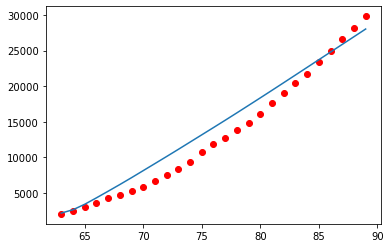

In [10]:
#limsx = [0, 150]
#limsy = [500, 30000]
#plt.xlim(limsx)
#plt.ylim(limsy)
plt.scatter(X_test, y_test, color = 'red')
plt.plot()
plt.plot(X_test, predict)